In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import glob
import os

Mounted at /content/drive


In [2]:
base_path = '/content/drive/MyDrive/Practice - Fatigue'
channels = ['R', 'G', 'B']
data = {}

for ch in channels:
    files = glob.glob(os.path.join(base_path, ch, '*.csv'))
    dfs = []
    for f in files:
        df = pd.read_csv(f)
        df['participant'] = os.path.basename(f).split('.')[0]
        dfs.append(df)
    data[ch] = pd.concat(dfs, ignore_index=True)

for ch in channels:
    print(f"{ch} shape:", data[ch].shape)

R shape: (1060, 63)
G shape: (1060, 63)
B shape: (1060, 63)


In [3]:
df.shape

(92, 63)

In [4]:
df.head(2)

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t53,t54,t55,t56,t57,t58,t59,file,AU,participant
0,119.344217,120.075255,120.748930,121.365242,121.924191,122.425777,125.861844,126.140417,125.120084,120.348854,...,122.397547,115.622804,112.568283,111.942115,113.928932,118.734756,121.429469,22-12-28-rings-morning_min0,0.65627,B_chunks_3
1,122.849835,129.015495,131.199588,131.477703,131.168276,130.786615,128.996779,125.636763,120.853319,117.482534,...,104.504694,104.419261,104.470362,104.595641,104.803225,104.794492,105.241609,22-12-28-rings-morning_min1,0.65627,B_chunks_3


In [5]:
data['R'].head(2)

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t53,t54,t55,t56,t57,t58,t59,file,AU,participant
0,74.484657,78.011725,80.891477,83.123914,84.709035,85.646841,84.851361,82.658496,82.689806,83.283521,...,76.974205,77.023029,76.408859,77.344812,78.13763,78.761922,79.185825,23-06-23-rings-morning-sync_min0,2.082702,R_chunks_12
1,79.409117,79.467470,79.261636,78.833085,78.210427,77.473354,78.290381,78.450168,78.568733,78.679530,...,78.709140,78.946261,79.130993,79.251530,79.33358,79.372347,79.400787,23-06-23-rings-morning-sync_min1,2.082702,R_chunks_12


In [6]:
import numpy as np

def extract_features(df):
    t_cols = [c for c in df.columns if c.startswith('t')]
    X = df[t_cols]
    features = pd.DataFrame({
        'mean': X.mean(axis=1),
        'std': X.std(axis=1),
        'min': X.min(axis=1),
        'max': X.max(axis=1),
        'skew': X.skew(axis=1),
        'kurt': X.kurt(axis=1),
    })
    features['AU'] = df['AU']
    return features

features = {ch: extract_features(data[ch]) for ch in channels}

In [7]:
merged = features['R'].add_suffix('_R').join(
          features['G'].add_suffix('_G')).join(
          features['B'].add_suffix('_B'))
merged['AU'] = data['R']['AU']  # same target

In [9]:
merged

,mean_R,std_R,min_R,max_R,skew_R,kurt_R,AU_R,mean_G,std_G,min_G,...,kurt_G,AU_G,mean_B,std_B,min_B,max_B,skew_B,kurt_B,AU_B,AU
0,82.237536,3.164352,74.484657,85.646841,-1.039391,-0.465115,2.082702,68.766110,2.580070,63.188813,...,-0.579770,2.082702,68.373775,3.177287,60.956921,71.753883,-1.013794,-0.650851,2.082702,2.082702
1,78.921790,0.628132,77.473354,80.153365,-0.140112,-0.701926,2.082702,65.747007,0.548815,64.566632,...,-0.683878,2.082702,62.415292,0.603197,61.041887,63.591368,-0.028210,-0.632266,2.082702,2.082702
2,80.181804,0.855171,78.439436,81.925368,-0.104557,-0.515175,2.082702,66.442318,0.638559,65.008047,...,-0.331868,2.082702,63.307850,0.700993,61.726673,64.638894,-0.353621,-0.321757,2.082702,2.082702
3,83.663824,1.496896,80.247841,85.864913,-0.556873,-0.515964,2.082702,68.546450,1.127918,66.241874,...,-0.601478,2.082702,66.009429,1.159902,63.244787,67.783886,-0.490536,-0.272025,2.082702,2.082702
4,80.706106,4.004497,75.982574,86.270612,0.089839,-1.967278,2.082702,64.614714,3.311279,60.636645,...,-1.964589,2.082702,62.772560,3.795762,58.216258,67.811919,0.086715,-1.975584,2.082702,2.082702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,117.452611,4.635365,97.949535,126.180002,-1.743768,6.261867,2.824627,116.708969,5.136194,95.198961,...,6.299287,2.824627,122.856184,5.548194,98.725986,132.666495,-2.094564,7.481876,2.824627,2.824627
1056,118.496174,2.257811,114.315006,122.435387,0.094417,-1.252442,2.824627,117.620517,2.214692,113.585547,...,-1.280164,2.824627,123.012259,1.852695,119.146556,126.010915,-0.043043,-1.028064,2.824627,2.824627
1057,119.110606,4.837796,112.865531,134.850188,1.762955,3.452136,2.824627,117.876508,5.004474,111.461183,...,3.714257,2.824627,124.295147,4.975960,117.966107,140.316006,1.722474,3.205922,2.824627,2.824627
1058,117.369963,3.263771,113.184712,128.412137,2.402602,5.081641,2.824627,115.629980,3.721245,110.876431,...,5.153657,2.824627,122.575755,3.039633,118.547413,132.824742,2.364222,4.942691,2.824627,2.824627


In [12]:
merged = merged.dropna(subset=['AU'])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = merged.drop(columns=['AU'])
y = merged['AU']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)          # <- manual RMSE
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {r2:.4f}")


print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}")

RMSE: 0.0039 | MAE: 0.0022 | R2: 1.0000
RMSE: 0.0039, MAE: 0.0022


In [15]:
y.describe()

,AU
count,1055.000000
mean,1.596382
std,0.888122
min,-0.412491
25%,0.921241
50%,1.706964
75%,2.389959
max,3.132404


In [16]:
X.columns[X.columns.str.contains('AU', case=False)]

Index(['AU_R', 'AU_G', 'AU_B'], dtype='object')

In [17]:
import numpy as np
y_shuffled = np.random.permutation(y)
model.fit(X_train, y_shuffled[:len(y_train)])
print("Score on random target:", model.score(X_test, y_test))


Score on random target: 0.03860727779069384


In [18]:
features_clean = {}
for ch in ['R', 'G', 'B']:
    features_clean[ch] = features[ch].drop(columns=['AU'])

merged = features_clean['R'].add_suffix('_R').join(
          features_clean['G'].add_suffix('_G')).join(
          features_clean['B'].add_suffix('_B'))

merged['AU'] = data['R']['AU']

In [21]:
merged = merged.dropna(subset=['AU'])

In [22]:
X = merged.drop(columns=['AU'])
y = merged['AU']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")

RMSE: 0.7167 | MAE: 0.5771 | R²: 0.3889


###Normal mectrics

Let's add more powerful features and try XGBoost

In [23]:
def extract_features(df):
    t_cols = [c for c in df.columns if c.startswith('t')]
    X = df[t_cols].copy()

    # basic stats
    feats = pd.DataFrame({
        'mean': X.mean(axis=1),
        'std': X.std(axis=1),
        'min': X.min(axis=1),
        'max': X.max(axis=1),
        'skew': X.skew(axis=1),
        'kurt': X.kurt(axis=1),
    })

    feats['energy'] = (X**2).sum(axis=1)

    # FFT mean magnitude
    fft_vals = np.abs(np.fft.rfft(X, axis=1))
    feats['fft_mean'] = fft_vals.mean(axis=1)

    # autocorrelation
    feats['autocorr'] = [X.iloc[i].autocorr(lag=1) for i in range(len(X))]

    feats['AU'] = df['AU']
    return feats

In [27]:
channels = ['R','G','B']
features = {ch: extract_features(data[ch]) for ch in channels}

features_clean = {ch: features[ch].drop(columns=['AU']) for ch in channels}

merged = (
    features_clean['R'].add_suffix('_R')
    .join(features_clean['G'].add_suffix('_G'))
    .join(features_clean['B'].add_suffix('_B'))
)
merged['AU'] = data['R']['AU']
merged = merged.dropna(subset=['AU'])
print(merged.shape)
merged.head(2)

(1055, 28)


,mean_R,std_R,min_R,max_R,skew_R,kurt_R,energy_R,fft_mean_R,autocorr_R,mean_G,...,mean_B,std_B,min_B,max_B,skew_B,kurt_B,energy_B,fft_mean_B,autocorr_B,AU
0,82.237536,3.164352,74.484657,85.646841,-1.039391,-0.465115,406371.509146,171.609039,0.954568,68.766110,...,68.373775,3.177287,60.956921,71.753883,-1.013794,-0.650851,281093.999066,143.936920,0.958611,2.082702
1,78.921790,0.628132,77.473354,80.153365,-0.140112,-0.701926,373742.216821,155.226306,0.910335,65.747007,...,62.415292,0.603197,61.041887,63.591368,-0.028210,-0.632266,233761.589612,123.220185,0.909045,2.082702


In [28]:
from xgboost import XGBRegressor
X = merged.drop(columns=['AU'])
y = merged['AU']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")

RMSE: 0.7450 | MAE: 0.6025 | R²: 0.3397


With only 1060 samples, 27 features can easily make XGBoost start chasing noise instead of signal - especially FFT and autocorr, which can act randomly

In [30]:
def extract_features(df):
    t_cols = [c for c in df.columns if c.startswith('t')]
    X = df[t_cols].copy()

    feats = pd.DataFrame({
        'mean': X.mean(axis=1),
        'std': X.std(axis=1),
        'min': X.min(axis=1),
        'max': X.max(axis=1),
        'skew': X.skew(axis=1),
        'kurt': X.kurt(axis=1),
        'energy': (X**2).sum(axis=1),
    })
    feats['AU'] = df['AU']
    return feats

features = {ch: extract_features(data[ch]) for ch in ['R', 'G', 'B']}
features_clean = {ch: features[ch].drop(columns=['AU']) for ch in ['R', 'G', 'B']}

merged = (
    features_clean['R'].add_suffix('_R')
    .join(features_clean['G'].add_suffix('_G'))
    .join(features_clean['B'].add_suffix('_B'))
)
merged['AU'] = data['R']['AU']
merged = merged.dropna(subset=['AU'])

In [31]:
X = merged.drop(columns=['AU'])
y = merged['AU']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.08,
    max_depth=3,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=2,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")

RMSE: 0.7485 | MAE: 0.6096 | R²: 0.3335


#Now let's experiment with inputs and models:

In [34]:
from sklearn.model_selection import GroupKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from collections import OrderedDict


In [37]:
base_path = '/content/drive/MyDrive/Practice - Fatigue'  # change if needed
channels = ['R','G','B']

data = {}
for ch in channels:
    files = glob.glob(os.path.join(base_path, ch, '*.csv'))
    dfs = []
    for f in files:
        df = pd.read_csv(f)
        df['participant'] = os.path.basename(f).split('.')[0]
        dfs.append(df)
    data[ch] = pd.concat(dfs, ignore_index=True)

In [38]:
def extract_features(df):
    t_cols = [c for c in df.columns if str(c).startswith('t')]
    X = df[t_cols].copy()

    feats = pd.DataFrame({
        'mean': X.mean(axis=1),
        'std':  X.std(axis=1),
        'min':  X.min(axis=1),
        'max':  X.max(axis=1),
        'skew': X.skew(axis=1),
        'kurt': X.kurt(axis=1),
        'energy': (X**2).sum(axis=1),
    })
    feats['AU'] = df['AU'].values
    feats['participant'] = df['participant'].values
    return feats

features = {ch: extract_features(data[ch]) for ch in channels}

In [39]:
def make_dataset(combination=('R',)):
    dfs = []
    for ch in combination:
        tmp = features[ch].drop(columns=['AU', 'participant']).add_suffix(f'_{ch}')
        dfs.append(tmp)
    X = pd.concat(dfs, axis=1)
    y = features['R']['AU'].copy()
    groups = features['R']['participant'].copy()
    XY = pd.concat([X, y.rename('AU')], axis=1).dropna()
    X = XY.drop(columns=['AU'])
    y = XY['AU']
    groups = groups.loc[XY.index]
    return X, y, groups

channel_sets = [
    ('R',), ('G',), ('B',),
    ('R','G'), ('R','B'), ('G','B'),
    ('R','G','B')
]

In [40]:
models = OrderedDict({
    'Ridge': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=1.0, random_state=42))
    ]),
    'ElasticNet': Pipeline([
        ('scaler', StandardScaler()),
        ('model', ElasticNet(alpha=0.05, l1_ratio=0.3, random_state=42, max_iter=10000))
    ]),
    'RandomForest': RandomForestRegressor(
        n_estimators=300, max_depth=None, min_samples_leaf=2, random_state=42, n_jobs=-1
    ),
    'XGB': XGBRegressor(
        n_estimators=300, learning_rate=0.07, max_depth=4,
        subsample=0.9, colsample_bytree=0.9,
        reg_lambda=2.0, random_state=42, n_jobs=-1
    ),
    'MLP': Pipeline([
        ('scaler', StandardScaler()),
        ('model', MLPRegressor(hidden_layer_sizes=(64,),
                               activation='relu',
                               alpha=1e-3,
                               learning_rate_init=1e-3,
                               max_iter=400,
                               random_state=42))
    ]),
})


In [41]:
def rmse_scorer(y_true, y_pred):
    return -np.sqrt(mean_squared_error(y_true, y_pred))  # negative for sklearn's maximize logic

scoring = {
    'rmse': make_scorer(rmse_scorer),
    'mae':  make_scorer(mean_absolute_error, greater_is_better=False),
    'r2':   make_scorer(r2_score),
}

results = []
for comb in channel_sets:
    X, y, groups = make_dataset(comb)
    gkf = GroupKFold(n_splits=5)

    for name, model in models.items():
        cv = cross_validate(
            model, X, y, cv=gkf.split(X, y, groups=groups),
            scoring=scoring, n_jobs=-1, return_train_score=False
        )
        rmse = -cv['test_rmse'].mean()
        mae  = -cv['test_mae'].mean()
        r2   =  cv['test_r2'].mean()
        results.append({
            'channels': ''.join(comb),
            'model': name,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2,
        })

results_df = pd.DataFrame(results).sort_values(['R2', 'RMSE'], ascending=[False, True])
results_df.reset_index(drop=True, inplace=True)
results_df

,channels,model,RMSE,MAE,R2
0,GB,Ridge,0.914036,0.792608,-0.340853
1,GB,ElasticNet,0.935062,0.811532,-0.401215
2,RGB,ElasticNet,0.947026,0.822533,-0.437018
3,RGB,Ridge,0.952791,0.833677,-0.441470
4,R,ElasticNet,0.963560,0.848281,-0.457201
5,G,ElasticNet,0.976648,0.850762,-0.507294
6,R,MLP,0.983807,0.855065,-0.521736
7,RB,ElasticNet,0.978188,0.847157,-0.541686
8,RGB,MLP,0.991119,0.842009,-0.554220
9,R,Ridge,0.993646,0.871083,-0.555369


count    1055.000000
mean        1.596382
std         0.888122
min        -0.412491
25%         0.921241
50%         1.706964
75%         2.389959
max         3.132404
Name: AU, dtype: float64


<Axes: >

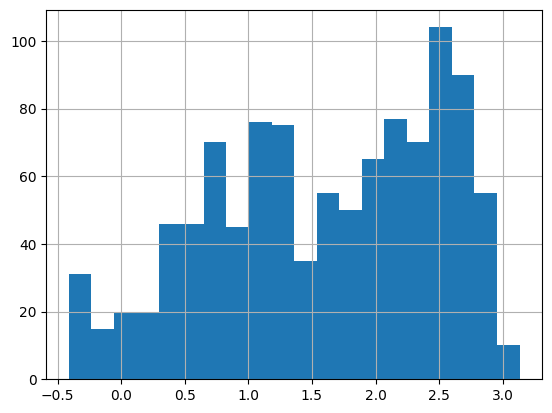

In [42]:
y = features['R']['AU']
print(y.describe())
y.hist(bins=20)

In [43]:
corr = merged.corr()['AU'].abs().sort_values(ascending=False)
top_feats = corr.index[1:10]  # top 10 most correlated
X = merged[top_feats]

master.shape: (1060, 8)
   channels         model      RMSE       MAE        R2
0         R        Linear  0.802745  0.700801 -0.038269
1       RGB        Linear  0.847063  0.670357 -0.156076
2         G        Linear  0.855675  0.740729 -0.179702
3        GB        Linear  0.857602  0.701865 -0.185022
4         B        Linear  0.877836  0.751356 -0.241599
5        RB        Linear  0.891314  0.761948 -0.280018
6        RG        Linear  0.898906  0.775309 -0.301918
7         R  RandomForest  0.922187  0.769707 -0.370227
8        GB  RandomForest  0.928507  0.771171 -0.389071
9       RGB  RandomForest  0.953946  0.791015 -0.466229
10      RGB           XGB  0.963591  0.787419 -0.496029
11        R           XGB  0.966760  0.802065 -0.505886
12        G  RandomForest  0.969186  0.790845 -0.513452
13       GB           XGB  0.975877  0.808534 -0.534421
14       RB  RandomForest  0.990028  0.826330 -0.579246
15        G           XGB  0.998146  0.816084 -0.605250
16        B  RandomFores

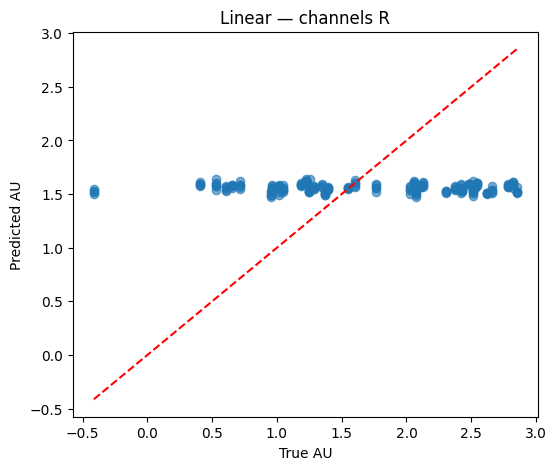

In [46]:
# --- dependencies (run once) ---
!pip -q install xgboost

import numpy as np
import pandas as pd
import glob, os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# --- 1) Build master dataframe with simple per-minute summaries ---
# Assumes you already have `data['R']`, `data['G']`, `data['B']` loaded as DataFrames,
# each row = one 60-sec sample with columns t0..t59 and column 'AU' and 'participant'.

def make_per_minute_summary(data):
    dfs = {}
    for ch in ['R','G','B']:
        df = data[ch].copy().reset_index(drop=True)
        # pick t-columns robustly
        t_cols = [c for c in df.columns if str(c).startswith('t')]
        # compute simple summaries (mean and energy)
        summary = pd.DataFrame({
            f'mean_{ch}': df[t_cols].mean(axis=1).values,
            f'energy_{ch}': (df[t_cols]**2).sum(axis=1).values,
            'AU': df['AU'].values,
            'participant': df['participant'].values
        })
        dfs[ch] = summary
    # sanity: assume rows align across R,G,B (same order of samples). If not, must align by participant+index.
    master = pd.DataFrame({
        'mean_R': dfs['R']['mean_R'],
        'energy_R': dfs['R']['energy_R'],
        'mean_G': dfs['G']['mean_G'],
        'energy_G': dfs['G']['energy_G'],
        'mean_B': dfs['B']['mean_B'],
        'energy_B': dfs['B']['energy_B'],
        'AU': dfs['R']['AU'],              # target (take from R by convention)
        'participant': dfs['R']['participant']
    })
    return master

master = make_per_minute_summary(data)
print("master.shape:", master.shape)
master.head()

# --- 2) Lag feature builder (uses per-minute summaries) ---
def create_lags(master_df, channels_summary, n_lags=5):
    """
    channels_summary: list of column prefixes to lag, e.g. ['mean_R','energy_R'] or ['mean_R'] etc
    returns: df with lagged features and target AU (drops NaNs created by shifting)
    """
    df = master_df.copy().reset_index(drop=True)
    for col in channels_summary:
        for lag in range(1, n_lags+1):
            df[f'{col}_lag{lag}'] = df[col].shift(lag)
    df = df.dropna().reset_index(drop=True)
    return df

# Example: if you want to use only the mean of each channel as basis:
channel_feature_map = {
    'R': ['mean_R'],
    'G': ['mean_G'],
    'B': ['mean_B'],
    'RG': ['mean_R','mean_G'],
    'RB': ['mean_R','mean_B'],
    'GB': ['mean_G','mean_B'],
    'RGB': ['mean_R','mean_G','mean_B']
}

# choose n_lags (how many previous minutes to use)
n_lags = 5

# --- 3) Model evaluation function (no shuffling; time-ordered split) ---
def eval_for_channels(master, channel_key, n_lags=5, test_size=0.2):
    cols_to_lag = channel_feature_map[channel_key]
    df_lagged = create_lags(master, cols_to_lag, n_lags=n_lags)
    # features are all columns that contain '_lag'
    feat_cols = [c for c in df_lagged.columns if '_lag' in c]
    X = df_lagged[feat_cols].values
    y = df_lagged['AU'].values

    # preserve time order: simple train/test split without shuffle
    split_idx = int((1 - test_size) * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    models = {
        'Linear': LinearRegression(),
        'RandomForest': RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
        'XGB': XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42, verbosity=0, n_jobs=-1)
    }

    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae  = mean_absolute_error(y_test, y_pred)
        r2   = r2_score(y_test, y_pred)
        results.append({'channels': channel_key, 'model': name, 'RMSE': rmse, 'MAE': mae, 'R2': r2})
    return results, (X_test, y_test, y_pred, feat_cols)

# --- 4) Run for all channel combos ---
all_results = []
examples = {}  # store one example test prediction per combo for plotting if needed
for ck in ['R','G','B','RG','RB','GB','RGB']:
    res, debug = eval_for_channels(master, ck, n_lags=n_lags, test_size=0.2)
    all_results.extend(res)
    examples[ck] = debug

results_df = pd.DataFrame(all_results).sort_values(['R2','RMSE'], ascending=[False, True])
results_df.reset_index(drop=True, inplace=True)
print(results_df)

# --- optional: plot predicted vs true for the best combo/model (simple) ---
import matplotlib.pyplot as plt
best = results_df.iloc[0]
print("Best:", best.to_dict())

# find corresponding example (we used the last model predictions stored in examples;
# but debug only returned last model's preds — so let's recompute best quickly)
best_combo = best['channels']; best_model = best['model']
X_test, y_test, y_pred, feat_cols = eval_for_channels(master, best_combo, n_lags=n_lags, test_size=0.2)[1]
# note: eval_for_channels debug returns (X_test, y_test, y_pred, feat_cols) for the last model (XGB)
# if you want the exact best_model's preds, recompute that specific model prediction:
# simpler: rerun and capture desired model predict
def get_preds_for(master, combo, model_name, n_lags=5):
    df_lagged = create_lags(master, channel_feature_map[combo], n_lags=n_lags)
    feat_cols = [c for c in df_lagged.columns if '_lag' in c]
    X = df_lagged[feat_cols].values
    y = df_lagged['AU'].values
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    if model_name == 'Linear':
        m = LinearRegression()
    elif model_name == 'RandomForest':
        m = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
    else:
        m = XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42, verbosity=0, n_jobs=-1)
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    return X_test, y_test, y_pred, feat_cols

X_test, y_test, y_pred, feat_cols = get_preds_for(master, best_combo, best_model, n_lags=n_lags)
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True AU')
plt.ylabel('Predicted AU')
plt.title(f'{best_model} — channels {best_combo}')
plt.show()
